### <h1>THE BEST NEIGHBORHOODS
##    <h2>1.	Introduction
#        <h3>1.1	Problem Statement:
            
My client is looking for the best location to open a restaurant in the beautiful and peaceful city of Mississauga, Ontario, Canada. Due the different types of buildings and amenities in the different neighborhoods within the city, my client wants to get a favourable location that will be best suited for his restaurant business. In getting this suitable location, I will be considering the amenities within different neighborhood and places where competitors are located within such neighborhood. This is aimed at maximizing profit for my client
            
#          <h3>1.2	Background:
    
Before now, my client has opened 4 different restaurants at different locations within Mississauga but realized he has always either been outsmarted by bigger competitors or opened a restaurant in at a location that does not attract customers. He then approached me to see if there is a way I can use some machine learning algorithm that can help him in making informed decision as to the best location to open his next restaurant.
             
#            <h2>2.	Data
I will be fetching my data by using BeautifulSoup to scrape the Wikipedia page for Canada’s postal codes and their neighborhoods: (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_L). With the postal codes for each neighborhood in Mississauga, I will then use Tableau to fetch the latitude and longitude of these postal codes.
The next step will be to use Foursquare to explore the venues in Mississauga and cluster the neighborhoods based on the categories of these venues using an unsupervised machine learning algorithm known as k-means. From these clusters I will be able to tell my client which neighborhoods will be best suited to open his next restaurant where he can attract more customers and perform better than his competitors. This will eventually lead to maximized profit.


# Methodology

In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install beautifulsoup4
!pip install lxml
!pip install html5lib
!pip install requests

from bs4 import BeautifulSoup

import requests
import urllib.request
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed folium
import folium # map rendering library

print('Libraries imported.')

Solving environment: | ^C
failed

CondaError: KeyboardInterrupt

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt

Libraries imported.


In [9]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_L'
#download the URL and extract the content to the variable html 

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

site_table = soup.table
column_names=[]

for data in site_table.find_all('td'):
    PostalCode = data.find('b').text
    Neighborhood = data.find('span').text
    column_names.append({'PostalCode': PostalCode, 'Neighborhood': Neighborhood})

L_postal = pd.DataFrame(column_names)

missi_data = L_postal[L_postal.Neighborhood.str.contains('Mississauga')].reset_index(drop='index')
missi_data

,Neighborhood,PostalCode
0,Mississauga(Mississauga Valley / East Cooksville),L5A
1,Mississauga(West Cooksville / Fairview / City ...,L5B
2,Mississauga(West Creditview / Mavis / Erindale),L5C
3,Mississauga(Central Lakeview),L5E
4,Mississauga(SW Lakeview / Mineola / East Port ...,L5G
5,Mississauga(West Port Credit / Lorne Park / Ea...,L5H
6,Mississauga(Clarkson / Southdown),L5J
7,Mississauga(West Sheridan),L5K
8,Mississauga(Erin Mills / Western Business Park),L5L
9,Mississauga(Churchill Meadows / Central Erin M...,L5M


Since geocoder wasn't working properly for me to get the latitude and longitude of postal codes, and Nominatim works with address not postal code, I exported my Mississauga dataframe and imported to Tableau. Tableau automatically generates coordinates of data with postal codes, cities or countries

In [10]:
#Exporting my missisauga dataframe  import it to Tableau to fetch latitude and longitude
output = missi_data
output.to_csv('miss_data.csv', index=False)

In [11]:
# The code was removed by Watson Studio for sharing.

,PostalCode,Latitude,Longitude
0,L5W,43.6312,-79.7128
1,L5V,43.5917,-79.6867
2,L5T,43.6550,-79.6725
3,L5S,43.6797,-79.6760
4,L5R,43.6107,-79.6768


In [12]:
#merging my previous mississuaga dataframe to the new df that contains the coordinates
full_mississauga_data = missi_data.merge(df_data_0, on = 'PostalCode')
full_mississauga_data

,Neighborhood,PostalCode,Latitude,Longitude
0,Mississauga(Mississauga Valley / East Cooksville),L5A,43.5887,-79.6094
1,Mississauga(West Cooksville / Fairview / City ...,L5B,43.5770,-79.6299
2,Mississauga(West Creditview / Mavis / Erindale),L5C,43.5666,-79.6562
3,Mississauga(Central Lakeview),L5E,43.5908,-79.5627
4,Mississauga(SW Lakeview / Mineola / East Port ...,L5G,43.5633,-79.5846
5,Mississauga(West Port Credit / Lorne Park / Ea...,L5H,43.5374,-79.6225
6,Mississauga(Clarkson / Southdown),L5J,43.5049,-79.6304
7,Mississauga(West Sheridan),L5K,43.5275,-79.6604
8,Mississauga(Erin Mills / Western Business Park),L5L,43.5328,-79.6954
9,Mississauga(Churchill Meadows / Central Erin M...,L5M,43.5666,-79.7132


In [38]:
#fetching the cooordinates of Mississauga using Nominatim
address = 'Mississauga, ON'

geolocator = Nominatim(user_agent="missi_ag")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Mississauga are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mississauga are 43.590338, -79.645729.


In [39]:
# create map of New York using latitude and longitude values
missi_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(full_mississauga_data['Latitude'], full_mississauga_data['Longitude'], full_mississauga_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(missi_map)  
    
missi_map

In [40]:
# The code was removed by Watson Studio for sharing.

In [41]:
#using Fourquare to explore the venues in Mississuaga
radius = 500
limit = 30
url_fs = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&oauth_token={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                                                                         CLIENT_SECRET,
                                                                                                                        ACCESS_TOKEN,
                                                                                                                        latitude,
                                                                                                                        longitude,
                                                                                                                        VERSION,
                                                                                                                        radius,
                                                                                                                        limit)

# 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_fs


'https://api.foursquare.com/v2/venues/explore?client_id=ELJOKNNICDUJECAHB20M1K51H3QHCW4A3IDZ5LWG1VQLGZQN&client_secret=0AZC45PB3GDTRLQOGQ4GPKC2BC2LAJ3ETWVUXACXHHEYMTGB&oauth_token=OALZUQA3D1BSNEO1UNCSWYY5FCRD354Y0NEPJ5N3YA0XAYTC&ll=43.590338,-79.645729&v=20190202&radius=500&limit=30'

In [42]:
results = requests.get(url_fs).json()

In [43]:
#defining a function that generates information of venues within a location
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
#using our getnearbyvenues function to generate information about the different venues in mississuaga from Foursquare
mississauga_venues = getNearbyVenues(names=full_mississauga_data['Neighborhood'],
                                   latitudes=full_mississauga_data['Latitude'],
                                   longitudes=full_mississauga_data['Longitude']
                                  )

Mississauga(Mississauga Valley / East Cooksville)
Mississauga(West Cooksville / Fairview / City Centre / East Creditview)
Mississauga(West Creditview / Mavis / Erindale)
Mississauga(Central Lakeview)
Mississauga(SW Lakeview / Mineola / East Port Credit)
Mississauga(West Port Credit / Lorne Park / East Sheridan)
Mississauga(Clarkson / Southdown)
Mississauga(West Sheridan)
Mississauga(Erin Mills / Western Business Park)
Mississauga(Churchill Meadows / Central Erin Mills / South Streetsville)
Mississauga(Lisgar / Meadowvale)
Mississauga(YYZ)
Mississauga(West Hurontario / SW Gateway)
Mississauga(Cardiff / NE Gateway)
Mississauga(Malton)
Mississauga(Courtney Park / East Gateway)
Mississauga(Wildwood)
Mississauga(East Credit)
Mississauga(Matheson / East Rathwood)
Mississauga(Meadowvale Village / West Gateway)
Mississauga(East Applewood / East Dixie / NE Lakeview)
Mississauga(West Applewood / West Dixie / NW Lakeview)
Mississauga(West Rathwood / East Hurontario / SE Gateway / Sandalwood)


In [45]:
print(mississauga_venues.shape)
mississauga_venues.head()

(145, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mississauga(Mississauga Valley / East Cooksville),43.5887,-79.6094,Szechuan Noodle Bowl 顺椿原,43.588900,-79.606520,Chinese Restaurant
1,Mississauga(Mississauga Valley / East Cooksville),43.5887,-79.6094,P.A.T. Oriental Food Market 한국식품,43.587361,-79.608480,Grocery Store
2,Mississauga(Mississauga Valley / East Cooksville),43.5887,-79.6094,Pizza Hut,43.586564,-79.609438,Pizza Place
3,Mississauga(Mississauga Valley / East Cooksville),43.5887,-79.6094,Country Style,43.587045,-79.607987,Coffee Shop
4,Mississauga(Mississauga Valley / East Cooksville),43.5887,-79.6094,Jang Kang,43.586141,-79.609948,Korean Restaurant


In [46]:
#explore the number of venues in each neighborhood
mississauga_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Mississauga(Cardiff / NE Gateway),2,2,2,2,2,2
Mississauga(Central Lakeview),6,6,6,6,6,6
Mississauga(Churchill Meadows / Central Erin Mills / South Streetsville),4,4,4,4,4,4
Mississauga(Clarkson / Southdown),9,9,9,9,9,9
Mississauga(Courtney Park / East Gateway),4,4,4,4,4,4
Mississauga(East Applewood / East Dixie / NE Lakeview),3,3,3,3,3,3
Mississauga(East Credit),5,5,5,5,5,5
Mississauga(Erin Mills / Western Business Park),4,4,4,4,4,4
Mississauga(Lisgar / Meadowvale),10,10,10,10,10,10


In [47]:
print('There are {} uniques categories.'.format(len(mississauga_venues['Venue Category'].unique())))

There are 75 uniques categories.


In [48]:
#one-hot encoding of the categories of mississauga venues
mississauga_one_hot = pd.get_dummies(mississauga_venues['Venue Category'])

#adding the neighborhood to the encoded df
mississauga_one_hot['Neighborhood'] = mississauga_venues['Neighborhood']

#moving the neighborhood column to the beginning of the df
new_cols = [mississauga_one_hot.columns[-1]] + list(mississauga_one_hot.columns[:-1])
mississauga_one_hot = mississauga_one_hot[new_cols]

print(mississauga_one_hot.shape)
mississauga_one_hot.head()

(145, 76)


,Neighborhood,Airport,Airport Terminal,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Field,Food,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gymnastics Gym,Hardware Store,Hobby Shop,Hookah Bar,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Nightclub,Noodle House,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Playground,Pool Hall,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Spa,Steakhouse,Storage Facility,Supermarket,Tennis Court,Train,Video Game Store,Vietnamese Restaurant
0,Mississauga(Mississauga Valley / East Cooksville),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mississauga(Mississauga Valley / East Cooksville),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mississauga(Mississauga Valley / East Cooksville),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mississauga(Mississauga Valley / East Cooksville),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mississauga(Mississauga Valley / East Cooksville),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
#grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category
mississauga_group = mississauga_one_hot.groupby('Neighborhood').mean().reset_index()
mississauga_group

,Neighborhood,Airport,Airport Terminal,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Field,Food,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gymnastics Gym,Hardware Store,Hobby Shop,Hookah Bar,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Nightclub,Noodle House,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Playground,Pool Hall,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Spa,Steakhouse,Storage Facility,Supermarket,Tennis Court,Train,Video Game Store,Vietnamese Restaurant
0,Mississauga(Cardiff / NE Gateway),0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000
1,Mississauga(Central Lakeview),0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.00,0.0,0.000000,0.000000,0.00,0.166667,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.166667,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000
2,Mississauga(Churchill Meadows / Central Erin M...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.250000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000
3,Mississauga(Clarkson / Southdown),0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.111111,0.0,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.111111,0.00,0.00,0.000000
4,Mississauga(Courtney Park / East Gateway),0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.250000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000

In [50]:
num_top_venues = 5

for hood in mississauga_group['Neighborhood']:
    print(hood)
    temp = mississauga_group[mississauga_group['Neighborhood']==hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop='True').head(num_top_venues))
    print('\n')

Mississauga(Cardiff / NE Gateway)
               venue  freq
0  Indian Restaurant   0.5
1     Baseball Field   0.5
2            Airport   0.0
3       Liquor Store   0.0
4          Nightclub   0.0


Mississauga(Central Lakeview)
                        venue  freq
0        Fast Food Restaurant  0.17
1                 Golf Course  0.17
2              Sandwich Place  0.17
3                   Juice Bar  0.17
4  Construction & Landscaping  0.17


Mississauga(Churchill Meadows / Central Erin Mills / South Streetsville)
               venue  freq
0    Bubble Tea Shop  0.25
1        Pizza Place  0.25
2           Bus Stop  0.25
3     Sandwich Place  0.25
4  Martial Arts Dojo  0.00


Mississauga(Clarkson / Southdown)
                 venue  freq
0          Coffee Shop  0.22
1             Pharmacy  0.22
2         Tennis Court  0.11
3    Indian Restaurant  0.11
4  Japanese Restaurant  0.11


Mississauga(Courtney Park / East Gateway)
               venue  freq
0     Shipping Store  0.25
1  Indian R

Time to cluster these neighborhoods based on the popular venues in each category.
I will also be using the elbow method to figure out the best number of clusters to group these neighborhoods

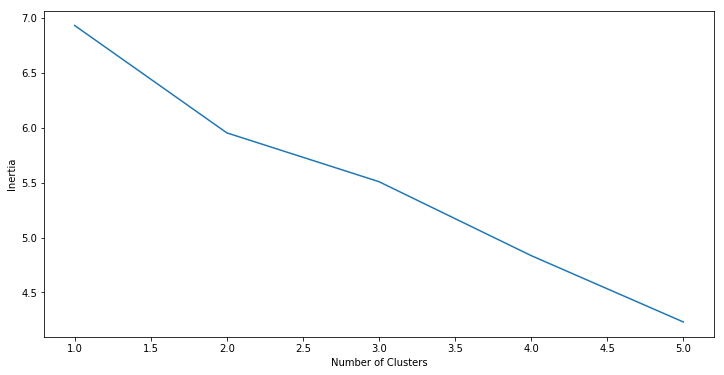

In [51]:
#creating a proper dataset for the k-means alogorithm by dropping the neighborhood column because machine learning algorithms work with on numerical data
mississauga_clustering = mississauga_group.drop('Neighborhood', axis=1)

#a for loop to test different numbers of clusters and compare their inertias to see which gives the elbow
#inertia is the sum of distances of all data points (neighborhood) within a cluster from the cluster's centroid
k_inertias = []
for k in range(1,6):
    k_means = KMeans(n_clusters = k, init='k-means++', random_state=46)
    k_means.fit(mississauga_clustering)
    k_inertias.append(k_means.inertia_)

#plotting numbers of clusters against the inertias of each number
plt.figure(figsize=(12,6))
plt.plot(range(1,6),k_inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

From the above graph, we see the elbow is made when there are 2 to 3 clusters. This means that the ideal number of clusters for the neighborhoods in Mississauga based on the categories of venues in Mississauga is between 2 & 3

In [52]:
#clustering Mississauga neighborhood into 3 clusters
k_clust = 3
k_means = KMeans(n_clusters = k_clust, init='k-means++', random_state=4)
k_means.fit(mississauga_clustering)
k_means.labels_

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2], dtype=int32)

In [53]:
#function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues] 

In [54]:
#creating a dataframe that displays top 10 venues in each neighborhood
num_top_venues = 10

indicators = ['st','nd','rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
  
        
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mississauga_group['Neighborhood']

for ind in np.arange(mississauga_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind,1:] = return_most_common_venues(mississauga_group.iloc[ind,:], num_top_venues)
    
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mississauga(Cardiff / NE Gateway),Baseball Field,Indian Restaurant,Electronics Store,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner
1,Mississauga(Central Lakeview),Greek Restaurant,Fast Food Restaurant,Construction & Landscaping,Juice Bar,Sandwich Place,Golf Course,Food,Field,Fried Chicken Joint,Electronics Store
2,Mississauga(Churchill Meadows / Central Erin M...,Sandwich Place,Bus Stop,Pizza Place,Bubble Tea Shop,Department Store,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega
3,Mississauga(Clarkson / Southdown),Coffee Shop,Pharmacy,Japanese Restaurant,Mexican Restaurant,Liquor Store,Indian Restaurant,Tennis Court,Electronics Store,Dry Cleaner,Dessert Shop
4,Mississauga(Courtney Park / East Gateway),Electronics Store,Indian Restaurant,Shipping Store,Bar,Dessert Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega
5,Mississauga(East Applewood / East Dixie / NE L...,Golf Course,Furniture / Home Store,Construction & Landscaping,Dessert Shop,Comedy Club,Convenience Store,Curling Ice,Deli / Bodega,Department Store,Dry Cleaner
6,Mississauga(East Credit),Dry Cleaner,Asian Restaurant,Food,Pizza Place,Indian Restaurant,Department Store,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice
7,Mississauga(Erin Mills / Western Business Park),Gas Station,Paper / Office Supplies Store,Park,Pharmacy,Deli / Bodega,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice
8,Mississauga(Lisgar / Meadowvale),Restaurant,Seafood Restaurant,Coffee Shop,Mediterranean Restaurant,Martial Arts Dojo,Pizza Place,Department Store,Chinese Restaurant,Gymnastics Gym,Dessert Shop
9,Mississauga(Malton),Bank,Vietnamese Restaurant,Dry Cleaner,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega,Department Store,Dessert Shop


In [55]:
#add clustering labels
neighborhoods_venues_sorted.insert(0,'Cluster Labels', k_means.labels_)
mississauga_merged = full_mississauga_data

#join with the mississauga data to mississauga_group to include the coordinates
mississauga_merged = mississauga_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

mississauga_merged

,Neighborhood,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mississauga(Mississauga Valley / East Cooksville),L5A,43.5887,-79.6094,2,Korean Restaurant,Grocery Store,Pizza Place,Coffee Shop,Motorcycle Shop,Chinese Restaurant,Bakery,Comedy Club,Furniture / Home Store,Fried Chicken Joint
1,Mississauga(West Cooksville / Fairview / City ...,L5B,43.5770,-79.6299,2,Train,Bus Station,Field,Playground,Vietnamese Restaurant,Department Store,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice
2,Mississauga(West Creditview / Mavis / Erindale),L5C,43.5666,-79.6562,2,Asian Restaurant,Chinese Restaurant,Noodle House,Italian Restaurant,Supermarket,Korean Restaurant,Spa,Bank,Cantonese Restaurant,Bubble Tea Shop
3,Mississauga(Central Lakeview),L5E,43.5908,-79.5627,2,Greek Restaurant,Fast Food Restaurant,Construction & Landscaping,Juice Bar,Sandwich Place,Golf Course,Food,Field,Fried Chicken Joint,Electronics Store
4,Mississauga(SW Lakeview / Mineola / East Port ...,L5G,43.5633,-79.5846,2,Coffee Shop,Deli / Bodega,Clothing Store,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Department Store,Dessert Shop,Vietnamese Restaurant
5,Mississauga(West Port Credit / Lorne Park / Ea...,L5H,43.5374,-79.6225,2,Tennis Court,Storage Facility,Vietnamese Restaurant,Dessert Shop,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega
6,Mississauga(Clarkson / Southdown),L5J,43.5049,-79.6304,2,Coffee Shop,Pharmacy,Japanese Restaurant,Mexican Restaurant,Liquor Store,Indian Restaurant,Tennis Court,Electronics Store,Dry Cleaner,Dessert Shop
7,Mississauga(West Sheridan),L5K,43.5275,-79.6604,2,Restaurant,Park,Baseball Field,Vietnamese Restaurant,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega,Department Store
8,Mississauga(Erin Mills / Western Business Park),L5L,43.5328,-79.6954,0,Gas Station,Paper / Office Supplies Store,Park,Pharmacy,Deli / Bodega,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice
9,Mississauga(Churchill Meadows / Central Erin M...,L5M,43.5666,-79.7132,2,Sandwich Place,Bus Stop,Pizza Place,Bubble Tea Shop,Department Store,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega


In [56]:
mississauga_merged.shape

(23, 15)

In [57]:
mississauga_merged.shape

(23, 15)

# Results

In [58]:
# create map
final_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clust)
ys = [i + x + (i*x)**2 for i in range(k_clust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mississauga_merged['Latitude'], mississauga_merged['Longitude'], mississauga_merged['Neighborhood'], mississauga_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(final_map)
       
final_map

Examining the clusters

In [59]:
#cluster 1
mississauga_merged.loc[mississauga_merged['Cluster Labels'] == 0, mississauga_merged.columns[[1] + list(range(5, mississauga_merged.shape[1]))]]

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,L5L,Gas Station,Paper / Office Supplies Store,Park,Pharmacy,Deli / Bodega,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice
16,L4V,Paper / Office Supplies Store,Dessert Shop,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega,Department Store,Vietnamese Restaurant


In [60]:
#cluster 2
mississauga_merged.loc[mississauga_merged['Cluster Labels'] == 1, mississauga_merged.columns[[1] + list(range(5, mississauga_merged.shape[1]))]]

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,L4T,Bank,Vietnamese Restaurant,Dry Cleaner,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega,Department Store,Dessert Shop


In [61]:
#cluster 3
mississauga_merged.loc[mississauga_merged['Cluster Labels'] == 2, mississauga_merged.columns[[1] + list(range(5, mississauga_merged.shape[1]))]]

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,L5A,Korean Restaurant,Grocery Store,Pizza Place,Coffee Shop,Motorcycle Shop,Chinese Restaurant,Bakery,Comedy Club,Furniture / Home Store,Fried Chicken Joint
1,L5B,Train,Bus Station,Field,Playground,Vietnamese Restaurant,Department Store,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice
2,L5C,Asian Restaurant,Chinese Restaurant,Noodle House,Italian Restaurant,Supermarket,Korean Restaurant,Spa,Bank,Cantonese Restaurant,Bubble Tea Shop
3,L5E,Greek Restaurant,Fast Food Restaurant,Construction & Landscaping,Juice Bar,Sandwich Place,Golf Course,Food,Field,Fried Chicken Joint,Electronics Store
4,L5G,Coffee Shop,Deli / Bodega,Clothing Store,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Department Store,Dessert Shop,Vietnamese Restaurant
5,L5H,Tennis Court,Storage Facility,Vietnamese Restaurant,Dessert Shop,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega
6,L5J,Coffee Shop,Pharmacy,Japanese Restaurant,Mexican Restaurant,Liquor Store,Indian Restaurant,Tennis Court,Electronics Store,Dry Cleaner,Dessert Shop
7,L5K,Restaurant,Park,Baseball Field,Vietnamese Restaurant,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega,Department Store
9,L5M,Sandwich Place,Bus Stop,Pizza Place,Bubble Tea Shop,Department Store,Comedy Club,Construction & Landscaping,Convenience Store,Curling Ice,Deli / Bodega
10,L5N,Restaurant,Seafood Restaurant,Coffee Shop,Mediterranean Restaurant,Martial Arts Dojo,Pizza Place,Department Store,Chinese Restaurant,Gymnastics Gym,Dessert Shop


# Discussion & Conclusion

From the above clusters, the k-means machine learning alogorithm was able to tell where next my client should open his restaurant.
The best suitable neighborhood for my client to open his next restaurant could be in any of the neighborhoods in the first cluster: 

<b>Mississauga(Erin Mills / Western Business Park) or Mississauga(Wildwood).</b>

In terms of the 10 most common amenities in these neighborhoods, Mississauga(Erin Mills / Western Business Park) do not have any restaurant as part of its top 10 amenities but has parks, gas station, comedy clubs, etc as part of the popular amenities around. This will be a perfect neighborhood for my client to open a restaurant as it will not only be proactive of him to give him the edge above his competitors, he will also be attracting customers who patronize other amenities around, thereby yeilding potential huge profit in the long run.
